## STROKE PREDECTION USING MACHINE LEARNING

### Problem Statement

Stroke is a severe cerebrovascular disease with potentially fatal consequences. Early prediction of stroke risk can significantly aid in preventive measures and timely medical interventions. In this project, we aim to develop a robust machine learning model to predict the likelihood of stroke based on various demographic, lifestyle, and clinical factors.

### Data Description

The dataset comprises 5110 patient records with attributes such as age, gender, hypertension, heart disease status, average glucose level, body mass index (BMI), smoking status, work type, residency type, and stroke event occurrence. The target variable is whether a patient has experienced a stroke or not.

In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
from scipy.stats import binom
import statistics
import scipy.stats as stats
from statsmodels.stats import weightstats
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score,mean_absolute_error,cohen_kappa_score,mean_absolute_percentage_error,confusion_matrix,classification_report,roc_curve,roc_auc_score
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier,StackingClassifier,VotingClassifier
import sklearn 
sklearn.metrics.get_scorer_names()
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier


In [2]:
df=pd.read_csv(r"C:\Users\Dell\Downloads\Project 1\Project 1\healthcare-dataset-stroke-data.csv")
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


### Checking the shape of the dataset 

In [3]:
df.shape

(5110, 12)

### Checking for null values

In [4]:
df[~df.isnull()]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [5]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

There are 201 null values in bmi column and in the rest of the columns there are no null values

### Investigating and predicting the missing BMI values 

In [6]:
df_scaled=pd.get_dummies(df,drop_first=True)

In [7]:
df_Scaled_null=df_scaled[df['bmi'].isnull()]
df_scaled_no_null=df_scaled.dropna(subset=['bmi'])

Xtrain=df_scaled_no_null.drop(columns='bmi')
ytrain=df_scaled_no_null['bmi']
xnull=df_Scaled_null.drop(columns='bmi')

lr=LinearRegression()
lr.fit(Xtrain,ytrain)

bmi_pred=lr.predict(xnull)
df_Scaled_null['bmi']=bmi_pred
df_treated=pd.concat([df_scaled_no_null,df_Scaled_null])
df_treated.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.6,1,1,0,1,0,1,0,0,1,1,0,0
2,31112,80.0,0,1,105.92,32.5,1,1,0,1,0,1,0,0,0,0,1,0
3,60182,49.0,0,0,171.23,34.4,1,0,0,1,0,1,0,0,1,0,0,1
4,1665,79.0,1,0,174.12,24.0,1,0,0,1,0,0,1,0,0,0,1,0
5,56669,81.0,0,0,186.21,29.0,1,1,0,1,0,1,0,0,1,1,0,0


In [8]:
df_treated.isnull().sum()

id                                0
age                               0
hypertension                      0
heart_disease                     0
avg_glucose_level                 0
bmi                               0
stroke                            0
gender_Male                       0
gender_Other                      0
ever_married_Yes                  0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
Residence_type_Urban              0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
dtype: int64

In [9]:
#To perform further EDA process, i will be imputing the predicted bmi values into the main data by equating it with the values from the treated data
df['bmi']=df_treated['bmi']

### Checking the data type of the columns

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.000000,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.000000,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.000000,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.000000,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.090000,271.74
bmi,5110.0,28.940800,7.731767,10.30,23.700,28.300,32.909568,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.000000,1.00


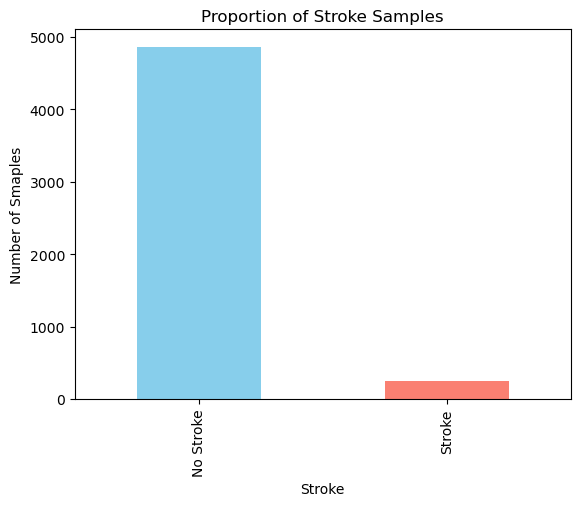

In [12]:
df['stroke'].value_counts().plot(kind='bar',color=['skyblue','salmon'])
plt.title('Proportion of Stroke Samples')
plt.xlabel('Stroke')
plt.ylabel('Number of Smaples')
plt.xticks(df['stroke'].value_counts().index,['No Stroke', 'Stroke'])
plt.show()

There is a notable class imbalance between the two categories.This class imbalance can impact the performance of machine learning models trained on this dataset, potentially leading to biased predictions

<Axes: xlabel='age', ylabel='Density'>

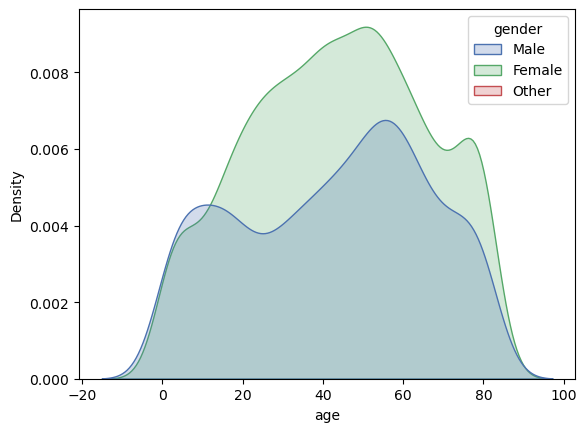

In [13]:
colors = {'Male': '#4C72B0', 'Female': '#55A868','Other': '#C44E52'}  # Custom colors for males and female
sns.kdeplot(data=df,x='age',hue='gender',fill=True,palette=colors)

* The peak of the KDE curve for females suggests that   the most common age range is likely centered around   30-60 years. 
* Similarly, the KDE curve for males shows a peak       indicating that the most common age range between     50-70 years
* Although there's only one sample labeled as "Other,"   it's still visible in the plot as a small peak or     bump in the KDE curve
* By comparing the KDE curves for females and males, we can observe potential overlaps 

### Visualizing the stroke smaples based on BMI and Glucose Level

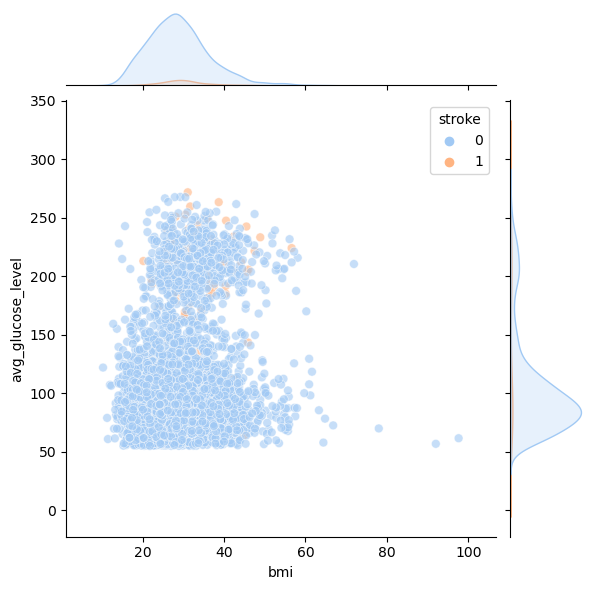

In [14]:
sns.jointplot(data=df,x='bmi',y='avg_glucose_level',hue='stroke',palette='pastel',alpha=0.6, s=40)
plt.show()

Due to potential overlapping it is not possible to draw accurate insights on how BMI and average glucose level has impact on whether a person will suffer stroke or no.

### Visualizing the stroke sample based on BMI and Age

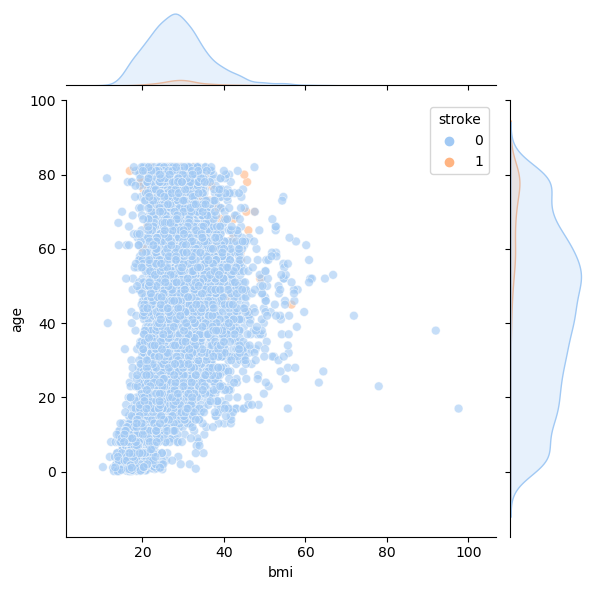

In [15]:
sns.jointplot(data=df, x='bmi', y='age', hue='stroke', palette='pastel',alpha=0.6, s=40)
plt.show()

Despite potential overlapping we can observe that there are people who suffered stroke at age ranging between 60-80 and BMI between 30-50.
But again due to overlapping we cannot assure that the drawn insights are 100% accurate and we won't be able to draw furthe insights.

### Visualizing the proportion of different smoking categories among the stroke population through a pie chart

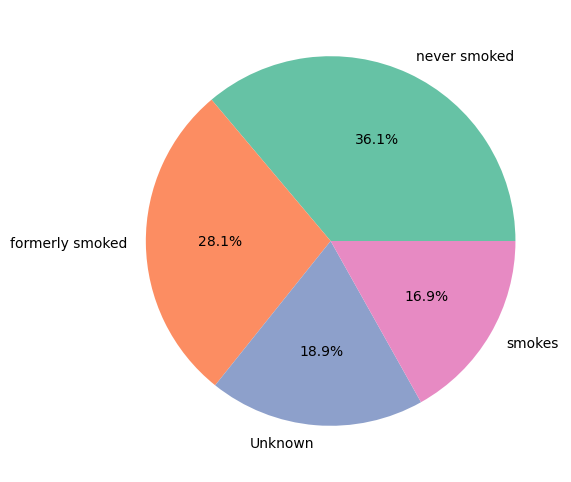

In [16]:
plt.figure(figsize=(8,6))
stroke=df[df['stroke']==1]
smoking_count=stroke['smoking_status'].value_counts()
plt.pie(smoking_count,labels=smoking_count.index,autopct='%1.1f%%',colors=['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3'])
plt.show()

Considering the people who suffered stoke, 36.1% of them never smoked, 28.1% for them use to smoke earlier, 18.9% of them havent mentioned their smoking status and 16.9% of them smoke.

### Dropping unnecessary columns

In [17]:
df.drop(columns='id',inplace=True)
#dropping the column id as it has unique observations and has no impact on the target variable

### Encoding the categorical variable

In [18]:
df['work_type'].replace(to_replace=['Private','Self-employed','Govt_job','children','Never_worked'],value=[0,1,2,1,-2],inplace=True)
df['ever_married'].replace(to_replace=['Yes','No'],value=[1,0],inplace=True)
df['smoking_status'].replace(to_replace=['never smoked','Unknown','formerly smoked','smokes'],value=[0,1,2,-1],inplace=True)

Though encoding can be done using the encoding techniques like one-hot dummy encoding, label encoding, frequency endocing etc, here we choose to hardcode as it would help us keep track of what the numeric values represent in the categorical variable.

### Plotting distribution of 'bmi' column 

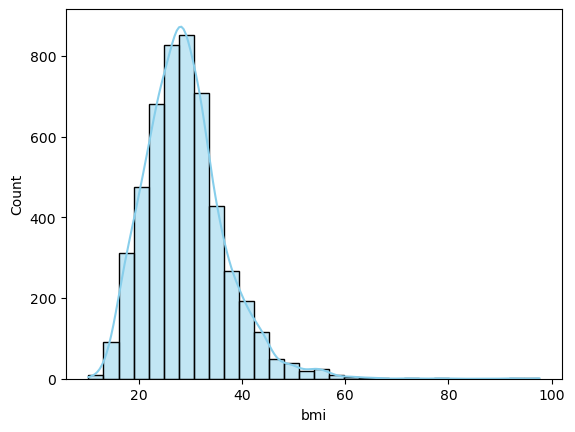

In [19]:
sns.histplot(data=df,x='bmi',color='skyblue',kde=True,bins=30)
plt.show()

INSIGHTS:-
* The BMI values are approximately normally distributed, with sight right skew
* Most of the population has BMI ranging between 20-35
* There are some outliers wiht higher BMI values.

### Columns which are highly skewed

In [20]:
skewness=df.skew()
skewness

age                 -0.137059
hypertension         2.715392
heart_disease        3.947244
ever_married        -0.657745
work_type            0.679586
avg_glucose_level    1.572284
bmi                  1.042538
smoking_status       0.082279
stroke               4.193284
dtype: float64

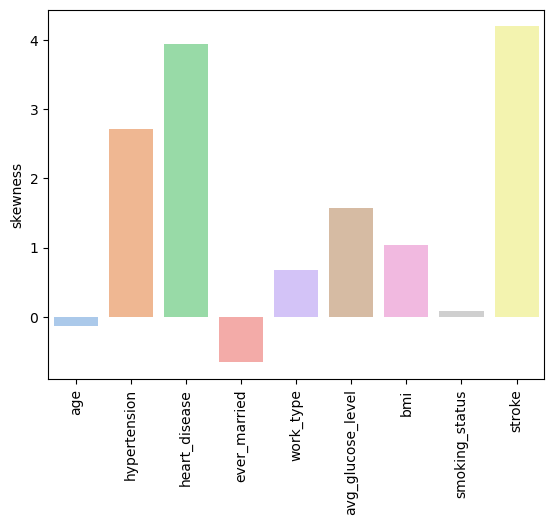

In [21]:
sns.barplot(y=skewness.values,x=skewness.index,palette='pastel')
plt.xticks(rotation=90)
plt.ylabel('skewness')
plt.show()

Considering 0.65/-0.65 as the threshold beyond which the columns are considered to be highly skewed, we can say that the columns hipertension, heart disease, work type, avg glucose level, bmi and stroke are highly right skewed. 
Whereas the column ever married is highly left skewed

### Columns that are highly kurtosis 

In [22]:
kurt=df.kurtosis()
kurt

age                  -0.991010
hypertension          5.375456
heart_disease        13.586052
ever_married         -1.567985
work_type            -0.085432
avg_glucose_level     1.680479
bmi                   3.488896
smoking_status       -0.922415
stroke               15.589736
dtype: float64

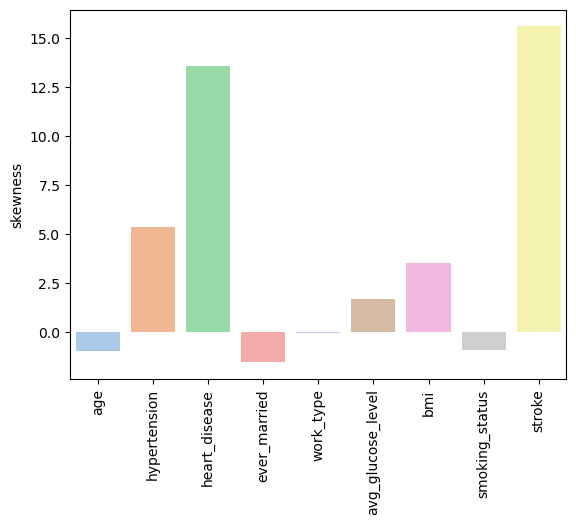

In [23]:
sns.barplot(y=kurt.values,x=kurt.index,palette='pastel')
plt.xticks(rotation=90)
plt.ylabel('skewness')
plt.show()

Any column with kurtosis higher than 3 are said be higly kurtosis.
Taking that into consideration the columns hipertension, heart diseases, bmi and stroke are said to be highly kurtosis

### Distribution of all variables with respect to the target variable

In [24]:
df=pd.get_dummies(df,drop_first=True)

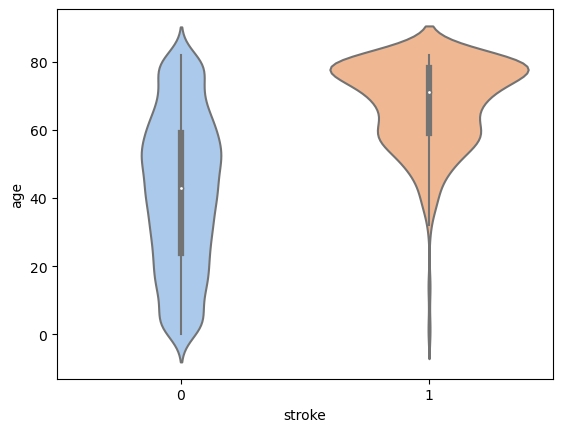

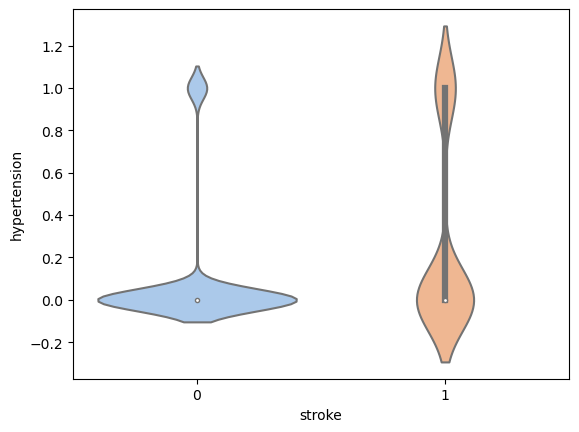

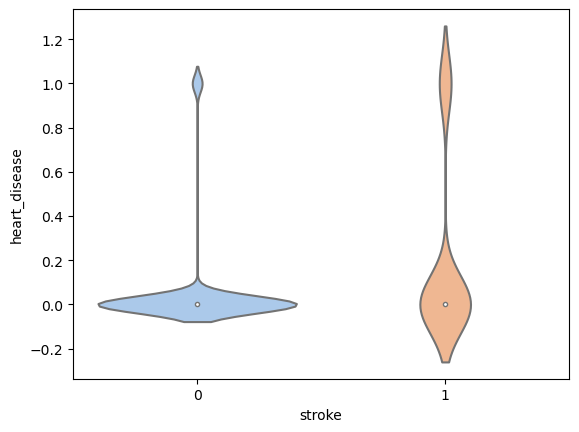

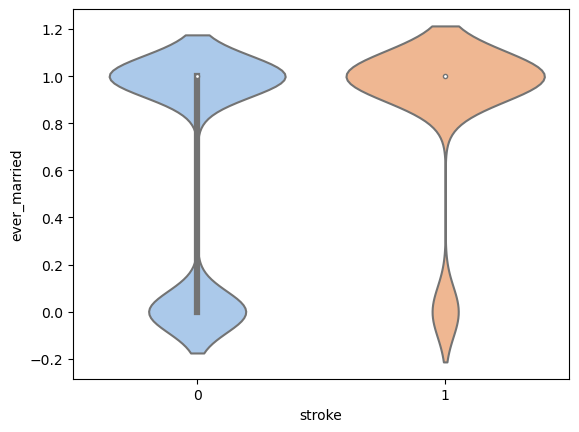

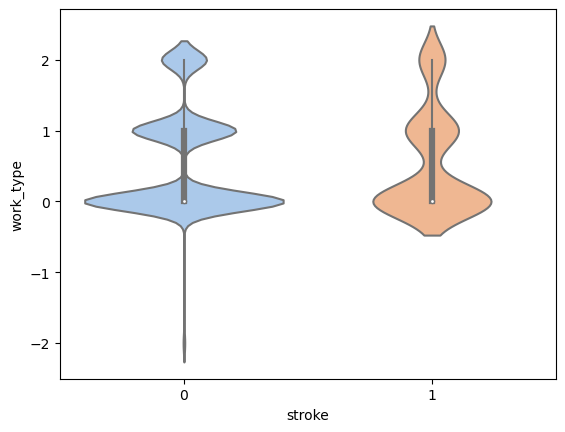

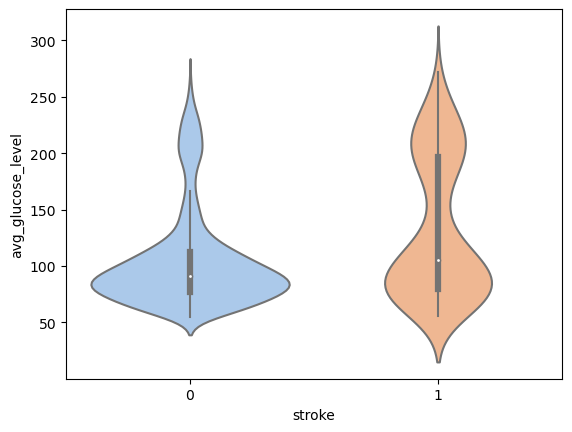

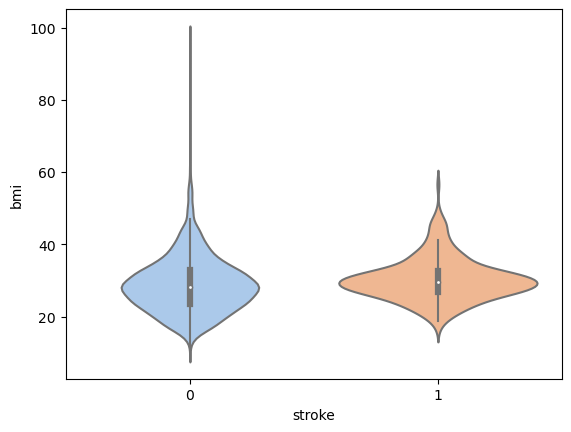

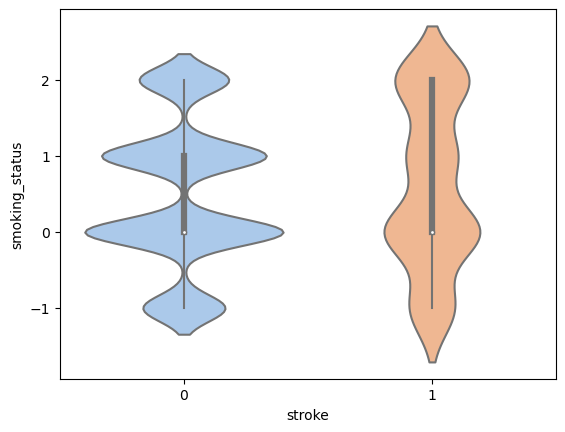

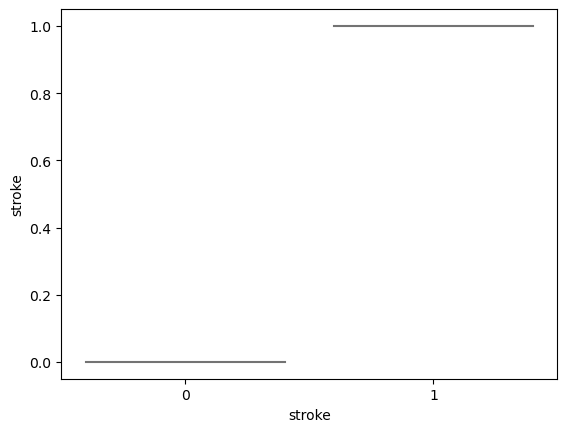

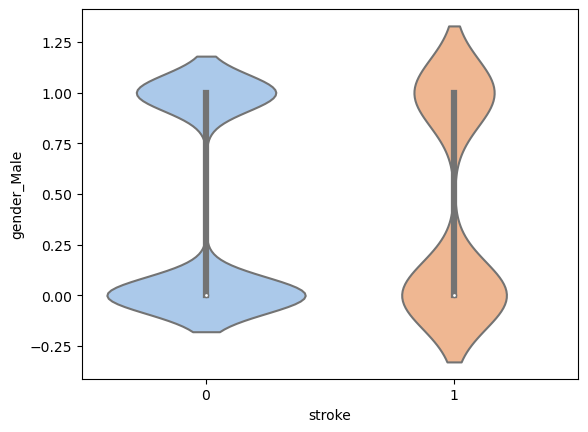

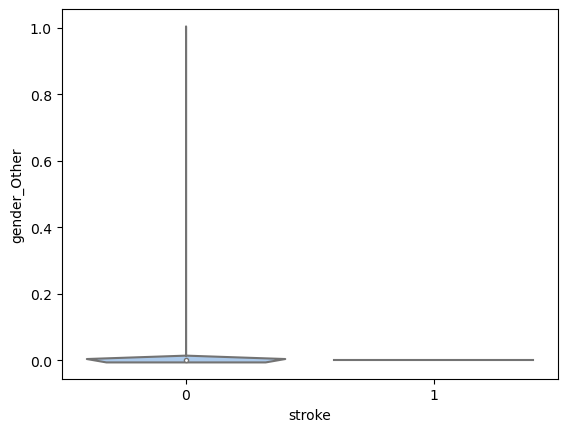

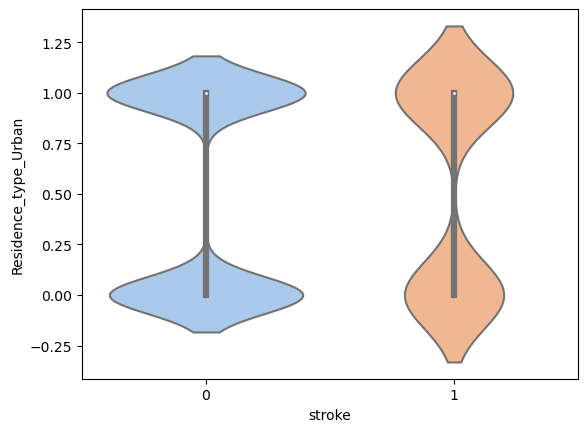

In [25]:
for i in df:
    sns.violinplot(data=df,x='stroke',y=i,palette='pastel')
    plt.show()

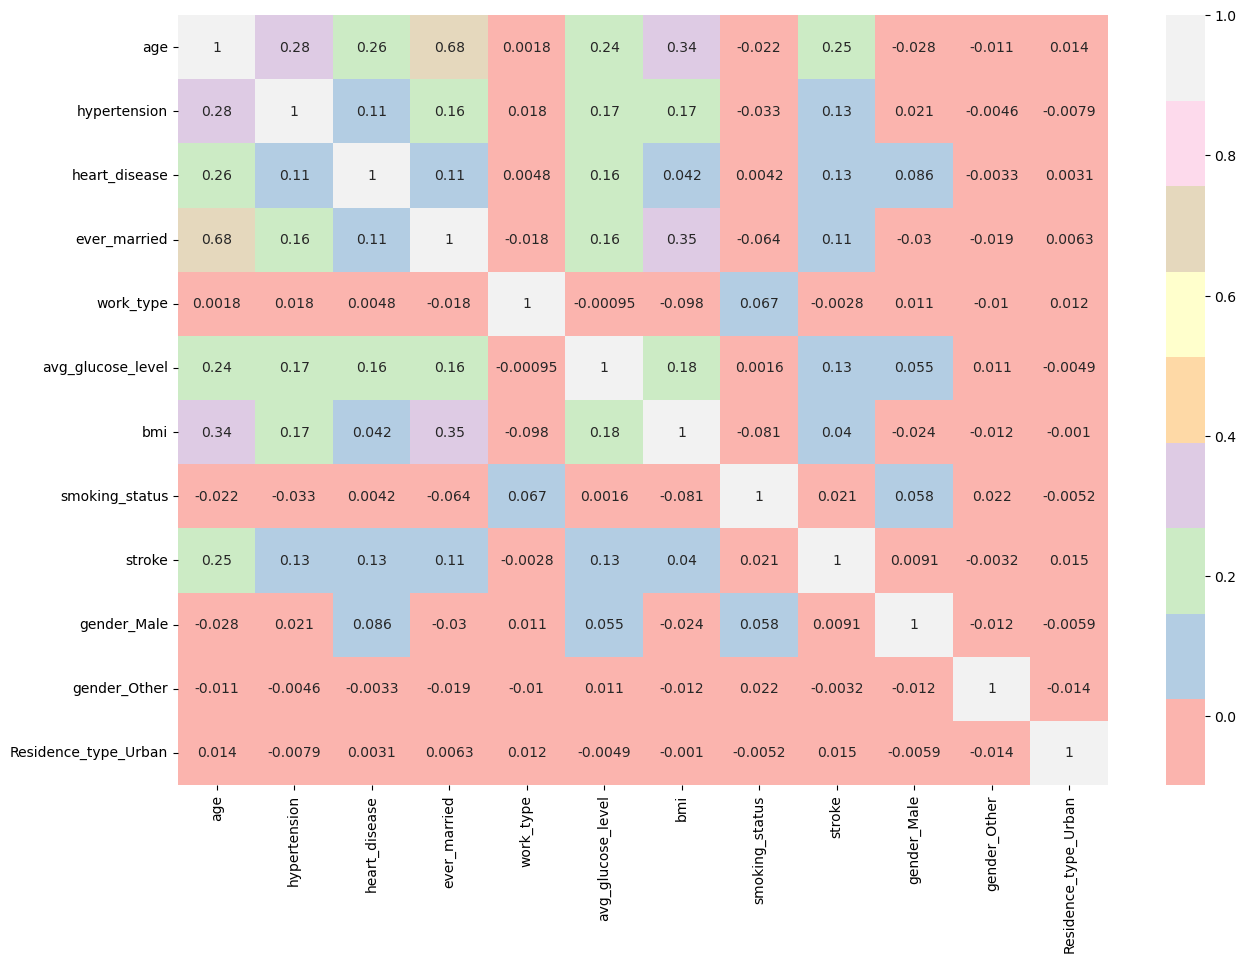

In [26]:
correlation=df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(correlation,annot=True,cmap='Pastel1')
plt.show()

As we can see in the heatmap there are no columns that are highly correlated to the target variable

### Splitting the data into training and testing data

In [27]:
x=df.drop(columns='stroke')
y=df['stroke']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3)

In [28]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(3577, 11)
(1533, 11)
(3577,)
(1533,)


### Checking whether the dataset is balanced or not 

In [29]:
distribution=df['stroke'].value_counts()
print(distribution/distribution.sum())

0    0.951272
1    0.048728
Name: stroke, dtype: float64


This clearly shows that the data is immbalanced. 
We will be using SMOTE technique to treat as the data is highly immbalanced.

In [30]:
smote=SMOTE(random_state=10)
xtrain_resampled,ytrain_resampled=smote.fit_resample(xtrain,ytrain)

In [31]:
xtrain_resampled_df=pd.DataFrame(xtrain_resampled,columns=xtrain.columns)
ytrain_resampled_series=pd.Series(ytrain_resampled,name=ytrain.name)

In [32]:
# checking if the immbalance is treated or no
ytrain_resampled_series.value_counts()
#yes it is balanced

0    3408
1    3408
Name: stroke, dtype: int64

## Model Building

### Logistic regression

In [46]:
def model_validation(model,xtrain_resampled,ytrain_resampled,xtest,ytest):
    global m
    m=model
    m.fit(xtrain_resampled,ytrain_resampled)
    ypred=m.predict(xtest) #hard prediction(0,1)
    prob=m.predict_proba(xtest)[:,-1] #soft prediction (probability of 1)
    
    print('Accuracy:',accuracy_score(ytest,ypred))
    print('Confusion Matric:\n',confusion_matrix(ytest,ypred))
    print('Report:\n', classification_report(ytest,ypred))
    print('Cohen kappa score:',cohen_kappa_score(ytest,ypred))
    
    fpr,tpr,thr=roc_curve(ytest,prob)
    plt.plot(fpr,tpr)
    plt.plot([0,1],[0,1],color='red')
    plt.title(f'AUC SCORE{roc_auc_score(ytest,prob)}')

Accuracy: 0.7697325505544683
Confusion Matric:
 [[1132  321]
 [  32   48]]
Report:
               precision    recall  f1-score   support

           0       0.97      0.78      0.87      1453
           1       0.13      0.60      0.21        80

    accuracy                           0.77      1533
   macro avg       0.55      0.69      0.54      1533
weighted avg       0.93      0.77      0.83      1533

Cohen kappa score: 0.14004643424120056


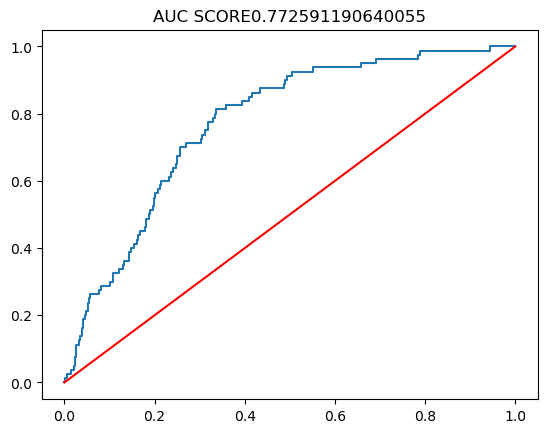

In [47]:
lr=LogisticRegression()
model_validation(lr,xtrain_resampled,ytrain_resampled,xtest,ytest)

### Decision Tree

Accuracy: 0.8499673842139596
Confusion Matric:
 [[1284  169]
 [  61   19]]
Report:
               precision    recall  f1-score   support

           0       0.95      0.88      0.92      1453
           1       0.10      0.24      0.14        80

    accuracy                           0.85      1533
   macro avg       0.53      0.56      0.53      1533
weighted avg       0.91      0.85      0.88      1533

Cohen kappa score: 0.07399333970648492


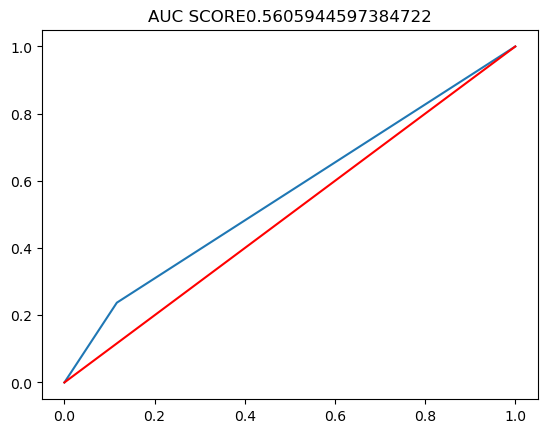

In [48]:
dtc=DecisionTreeClassifier()
model_validation(dtc,xtrain_resampled,ytrain_resampled,xtest,ytest)

### Gradient Boosting

Accuracy: 0.8036529680365296
Confusion Matric:
 [[1199  254]
 [  47   33]]
Report:
               precision    recall  f1-score   support

           0       0.96      0.83      0.89      1453
           1       0.11      0.41      0.18        80

    accuracy                           0.80      1533
   macro avg       0.54      0.62      0.53      1533
weighted avg       0.92      0.80      0.85      1533

Cohen kappa score: 0.1069459309335754


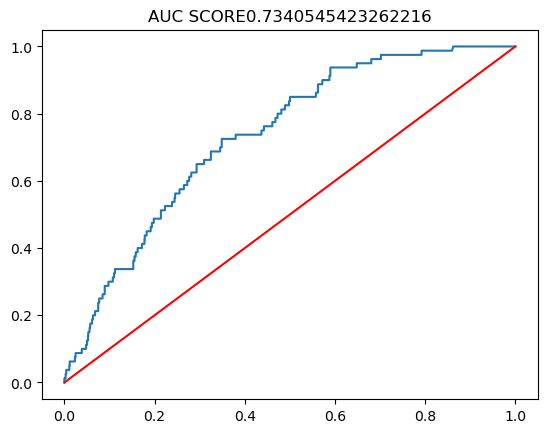

In [50]:
gb=GradientBoostingClassifier()
model_validation(gb,xtrain_resampled,ytrain_resampled,xtest,ytest)

### ADABoost

Accuracy: 0.7906066536203522
Confusion Matric:
 [[1179  274]
 [  47   33]]
Report:
               precision    recall  f1-score   support

           0       0.96      0.81      0.88      1453
           1       0.11      0.41      0.17        80

    accuracy                           0.79      1533
   macro avg       0.53      0.61      0.53      1533
weighted avg       0.92      0.79      0.84      1533

Cohen kappa score: 0.09566829795406062


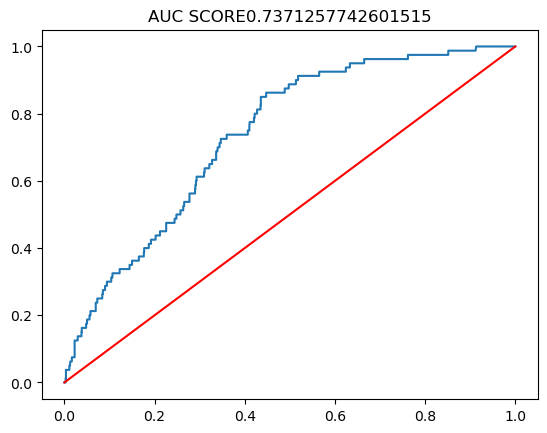

In [51]:
adb=AdaBoostClassifier()
model_validation(adb,xtrain_resampled,ytrain_resampled,xtest,ytest)

### XGB

Accuracy: 0.8812785388127854
Confusion Matric:
 [[1337  116]
 [  66   14]]
Report:
               precision    recall  f1-score   support

           0       0.95      0.92      0.94      1453
           1       0.11      0.17      0.13        80

    accuracy                           0.88      1533
   macro avg       0.53      0.55      0.53      1533
weighted avg       0.91      0.88      0.89      1533

Cohen kappa score: 0.07346992993059476


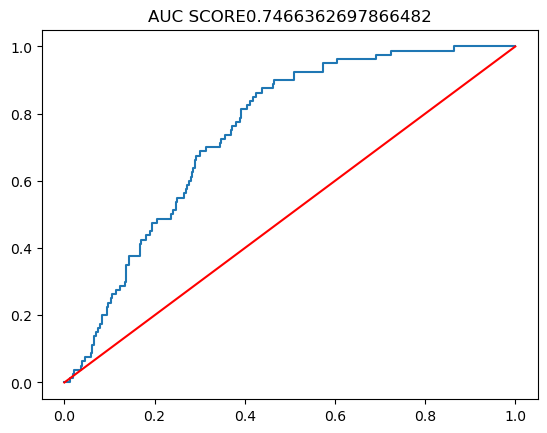

In [52]:
xgb=XGBClassifier()
model_validation(xgb,xtrain_resampled,ytrain_resampled,xtest,ytest)

### Random Forest

Accuracy: 0.8819308545335942
Confusion Matric:
 [[1337  116]
 [  65   15]]
Report:
               precision    recall  f1-score   support

           0       0.95      0.92      0.94      1453
           1       0.11      0.19      0.14        80

    accuracy                           0.88      1533
   macro avg       0.53      0.55      0.54      1533
weighted avg       0.91      0.88      0.90      1533

Cohen kappa score: 0.08274298106134492


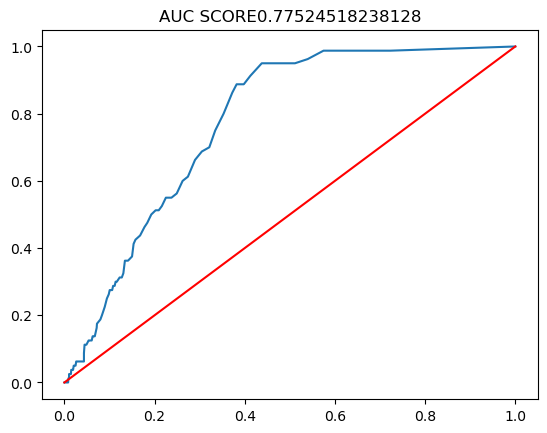

In [55]:
rf=RandomForestClassifier()
model_validation(rf,xtrain_resampled,ytrain_resampled,xtest,ytest)

In [58]:
params={'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
       'min_samples_split':[2,5,10]}

gscv=GridSearchCV(estimator=rf,param_grid=params,cv=3)
gscv.fit(xtrain_resampled, ytrain_resampled)
ypred=gscv.predict(xtest)
accuracy = accuracy_score(ytest, ypred)

In [61]:
gscv.best_params_

{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}

Accuracy: 0.8825831702544031
Confusion Matric:
 [[1340  113]
 [  67   13]]
Report:
               precision    recall  f1-score   support

           0       0.95      0.92      0.94      1453
           1       0.10      0.16      0.13        80

    accuracy                           0.88      1533
   macro avg       0.53      0.54      0.53      1533
weighted avg       0.91      0.88      0.89      1533

Cohen kappa score: 0.06662878249751392


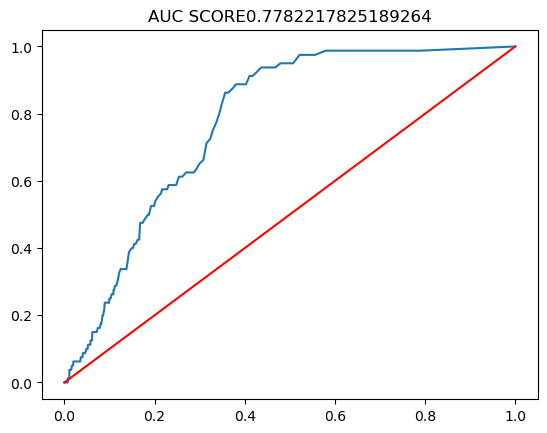

In [62]:
rf=RandomForestClassifier(n_estimators=200,max_depth=None,min_samples_split=2)
model_validation(rf,xtrain_resampled,ytrain_resampled,xtest,ytest)

In [69]:
params={'n_estimators': [80,100,120],
    'max_depth': [3,6,9],
       'min_samples_split':[1,4,7]}

gscv=GridSearchCV(estimator=rf,param_grid=params,cv=3)
gscv.fit(xtrain_resampled, ytrain_resampled)
ypred=gscv.predict(xtest)
accuracy = accuracy_score(ytest, ypred)

In [70]:
gscv.best_params_

{'max_depth': 9, 'min_samples_split': 4, 'n_estimators': 80}

Accuracy: 0.8806262230919765
Confusion Matric:
 [[1335  118]
 [  65   15]]
Report:
               precision    recall  f1-score   support

           0       0.95      0.92      0.94      1453
           1       0.11      0.19      0.14        80

    accuracy                           0.88      1533
   macro avg       0.53      0.55      0.54      1533
weighted avg       0.91      0.88      0.89      1533

Cohen kappa score: 0.08095030614350907


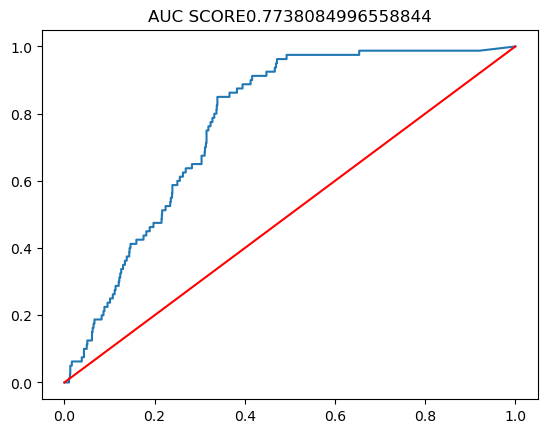

In [71]:
rf=RandomForestClassifier(n_estimators=450,max_depth=40,min_samples_split=10)
model_validation(rf,xtrain_resampled,ytrain_resampled,xtest,ytest)

In [63]:
params={'n_estimators': [150,250,350],
    'max_depth': [None, 5,15,25],
       'min_samples_split':[4,6,8]}

gscv=GridSearchCV(estimator=rf,param_grid=params,cv=3)
gscv.fit(xtrain_resampled, ytrain_resampled)
ypred=gscv.predict(xtest)
accuracy = accuracy_score(ytest, ypred)

In [64]:
gscv.best_params_

{'max_depth': 25, 'min_samples_split': 4, 'n_estimators': 150}

Accuracy: 0.8851924331376386
Confusion Matric:
 [[1343  110]
 [  66   14]]
Report:
               precision    recall  f1-score   support

           0       0.95      0.92      0.94      1453
           1       0.11      0.17      0.14        80

    accuracy                           0.89      1533
   macro avg       0.53      0.55      0.54      1533
weighted avg       0.91      0.89      0.90      1533

Cohen kappa score: 0.07881403384182573


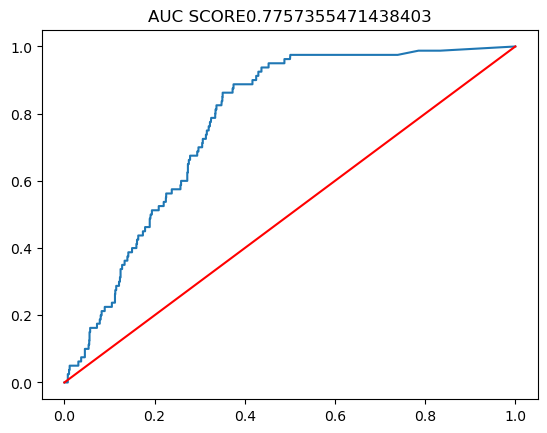

In [65]:
rf=RandomForestClassifier(n_estimators=150,max_depth=25,min_samples_split=4)
model_validation(rf,xtrain_resampled,ytrain_resampled,xtest,ytest)

### Conclusion

After extensive hyperparameter tuning and experimentation, the Random Forest model emerged as the best-performing classifier for predicting stroke risk in the dataset. The model achieved an accuracy of 0.8838878016960209 on the test set, demonstrating its effectiveness in distinguishing between individuals at high and low risk of experiencing a stroke.